In [40]:
import tensorflow as tf
import keras as ks
from keras import models
from keras import metrics
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection

In [41]:
data=pd.read_csv('/content/AMZN.csv').round(2)

In [42]:
puredata=pd.read_csv('/content/AMZN.csv').round(2)

In [43]:
data=data.sample(frac=1).dropna()
data

,Date,High,Low,Close,Adj Close,Volume,Open,Interest,Currency,Inflation,Day,Month
6252,2022-03-21,163.08,159.55,161.49,161.49,66538000.0,161.12,2.13,0.7591213,8.5,21,3
1574,2003-08-20,2.20,2.15,2.19,2.19,134494000.0,2.15,4.45,0.6274934,2.2,20,8
540,1999-07-09,3.19,3.10,3.14,3.14,111636000.0,3.15,5.79,0.6348031,2.1,9,7
4850,2016-08-24,38.17,37.77,37.86,37.86,34882000.0,38.15,1.56,0.76343,1.1,24,8
2816,2008-07-28,3.92,3.74,3.80,3.80,209604000.0,3.85,4.01,0.5031739,5.6,28,7
...,...,...,...,...,...,...,...,...,...,...,...,...
5314,2018-06-28,85.28,83.06,85.07,85.07,90594000.0,83.63,2.91,0.7526105,2.9,28,6
6075,2021-07-08,188.00,181.06,186.57,186.57,103612000.0,182.18,1.32,0.7242691,5.4,8,7
5193,2018-01-04,60.79,60.23,60.48,60.48,60442000.0,60.25,2.58,0.7239287,2.1,4,1
1111,2001-10-17,0.50,0.44,0.45,0.45,178890000.0,0.50,4.57,0.6889161,2.1,17,10


In [44]:
train=data.iloc[:int(0.8*len(data))]
test=data.iloc[int(0.8*len(data)):]

In [45]:
test.to_csv('testing_dataset.csv')
train.to_csv('training_dataset.csv')

In [46]:
train.tail()

,Date,High,Low,Close,Adj Close,Volume,Open,Interest,Currency,Inflation,Day,Month
5579,2019-07-19,99.80,98.11,98.23,98.23,6.371200e+07,99.56,2.06,0.8021478,1.8,19,7
933,2001-01-29,1.04,0.94,1.01,1.01,1.542600e+08,0.96,5.16,0.676888,3.7,29,1
279,1998-06-25,0.87,0.80,0.83,0.83,1.089300e+09,0.83,5.5,0.6058046,1.7,25,6
172,1998-01-22,0.26,0.25,0.26,0.26,1.894320e+08,0.25,5.54,0.6106714,1.6,22,1
6097,2021-08-09,167.74,166.43,167.09,167.09,4.296400e+07,167.18,1.28,0.7248005,5.3,9,8


In [47]:
X=train.iloc[:,[1,2,6,7,8,9,10,11]]
X.head()

,High,Low,Open,Interest,Currency,Inflation,Day,Month
6252,163.08,159.55,161.12,2.13,0.7591213,8.5,21,3
1574,2.20,2.15,2.15,4.45,0.6274934,2.2,20,8
540,3.19,3.10,3.15,5.79,0.6348031,2.1,9,7
4850,38.17,37.77,38.15,1.56,0.76343,1.1,24,8
2816,3.92,3.74,3.85,4.01,0.5031739,5.6,28,7


In [48]:
Y=train.iloc[:,3:4]
Y.head()

,Close
6252,161.49
1574,2.19
540,3.14
4850,37.86
2816,3.80


In [56]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2)

In [64]:
metric=[metrics.RootMeanSquaredError(),metrics.MeanAbsoluteError(),metrics.MeanAbsolutePercentageError(),metrics.MeanSquaredLogarithmicError()]
def modelbuild():
    model = models.Sequential()
    model.add(ks.layers.Reshape((1,8,),input_shape=(8,)))
    model.add(ks.layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(1,8,)))

    model.add(ks.layers.Dropout(0.2))
    model.add(ks.layers.LSTM(64,activation='relu'))

    model.add(ks.layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=metric)
    return model
model=modelbuild()

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 1, 8)              0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            70144     
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 201,857
Trainable params: 201,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
x_train['Currency']=x_train['Currency'].astype(np.float64)
x_train['Interest']=x_train['Interest'].astype(np.float64)
x_train['Inflation']=x_train['Inflation'].astype(np.float64)
x_test['Currency']=x_test['Currency'].astype(np.float64)
x_test['Interest']=x_test['Interest'].astype(np.float64)
x_test['Inflation']=x_test['Inflation'].astype(np.float64)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4166 entries, 3996 to 2786
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       4166 non-null   float64
 1   Low        4166 non-null   float64
 2   Open       4166 non-null   float64
 3   Interest   4166 non-null   float64
 4   Currency   4166 non-null   float64
 5   Inflation  4166 non-null   float64
 6   Day        4166 non-null   int64  
 7   Month      4166 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 292.9 KB


In [65]:
stop = ks.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100,validation_data=(x_test, y_test),callbacks=[stop])
#training the model

test_loss, rmse, mae, mape, msle = model.evaluate(x_test, y_test, verbose=2)

print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)

Epoch 1/100
131/131 [==============================] - 6s 14ms/step - loss: 573.5609 - root_mean_squared_error: 23.9491 - mean_absolute_error: 8.6724 - mean_absolute_percentage_error: 80.7231 - mean_squared_logarithmic_error: 0.7731 - val_loss: 2.7976 - val_root_mean_squared_error: 1.6726 - val_mean_absolute_error: 0.9929 - val_mean_absolute_percentage_error: 36.6256 - val_mean_squared_logarithmic_error: 0.0258
Epoch 2/100
131/131 [==============================] - 1s 7ms/step - loss: 26.8759 - root_mean_squared_error: 5.1842 - mean_absolute_error: 2.4847 - mean_absolute_percentage_error: 28.0895 - mean_squared_logarithmic_error: 0.0249 - val_loss: 4.1763 - val_root_mean_squared_error: 2.0436 - val_mean_absolute_error: 1.1568 - val_mean_absolute_percentage_error: 20.6226 - val_mean_squared_logarithmic_error: 0.0123
Epoch 3/100
131/131 [==============================] - 1s 8ms/step - loss: 26.2561 - root_mean_squared_error: 5.1241 - mean_absolute_error: 2.3788 - mean_absolute_percentage

In [66]:
X=test.iloc[:,[1,2,6,7,8,9,10,11]]
Y=test.iloc[:,3:4]

In [71]:
X=X.astype(np.float64)
X.tail()

,High,Low,Open,Interest,Currency,Inflation,Day,Month
5314,85.28,83.06,83.63,2.91,0.752610,2.9,28.0,6.0
6075,188.00,181.06,182.18,1.32,0.724269,5.4,8.0,7.0
5193,60.79,60.23,60.25,2.58,0.723929,2.1,4.0,1.0
1111,0.50,0.44,0.50,4.57,0.688916,2.1,17.0,10.0
5544,91.47,90.39,91.27,2.40,0.778637,1.8,30.0,5.0


In [68]:
Y.tail()

,Close
5314,85.07
6075,186.57
5193,60.48
1111,0.45
5544,90.82


In [72]:
test_loss, rmse, mae, mape, msle = model.evaluate(X,Y, verbose=1)
print('\nMean Squared Error: ', test_loss)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Mean Squared Logarithmic Error: ', msle)
print("Want to save model?")
c=input()
if c=='y':
  ks.Model.save(model,'/content/models')

41/41 [==============================] - 0s 5ms/step - loss: 0.7873 - root_mean_squared_error: 0.8873 - mean_absolute_error: 0.4796 - mean_absolute_percentage_error: 6.6344 - mean_squared_logarithmic_error: 0.0016

Mean Squared Error:  0.7873266339302063
Root Mean Squared Error:  0.8873142600059509
Mean Absolute Error:  0.47955644130706787
Mean Absolute Percentage Error:  6.634394645690918
Mean Squared Logarithmic Error:  0.0016395021229982376
Want to save model?
y


In [ ]:
PX=puredata.iloc[:,[1,2,6,7,8,9,10,11]].dropna()
PY=puredata.iloc[:,3:4]
predicted_prices=model.predict(PX.astype(np.float64))

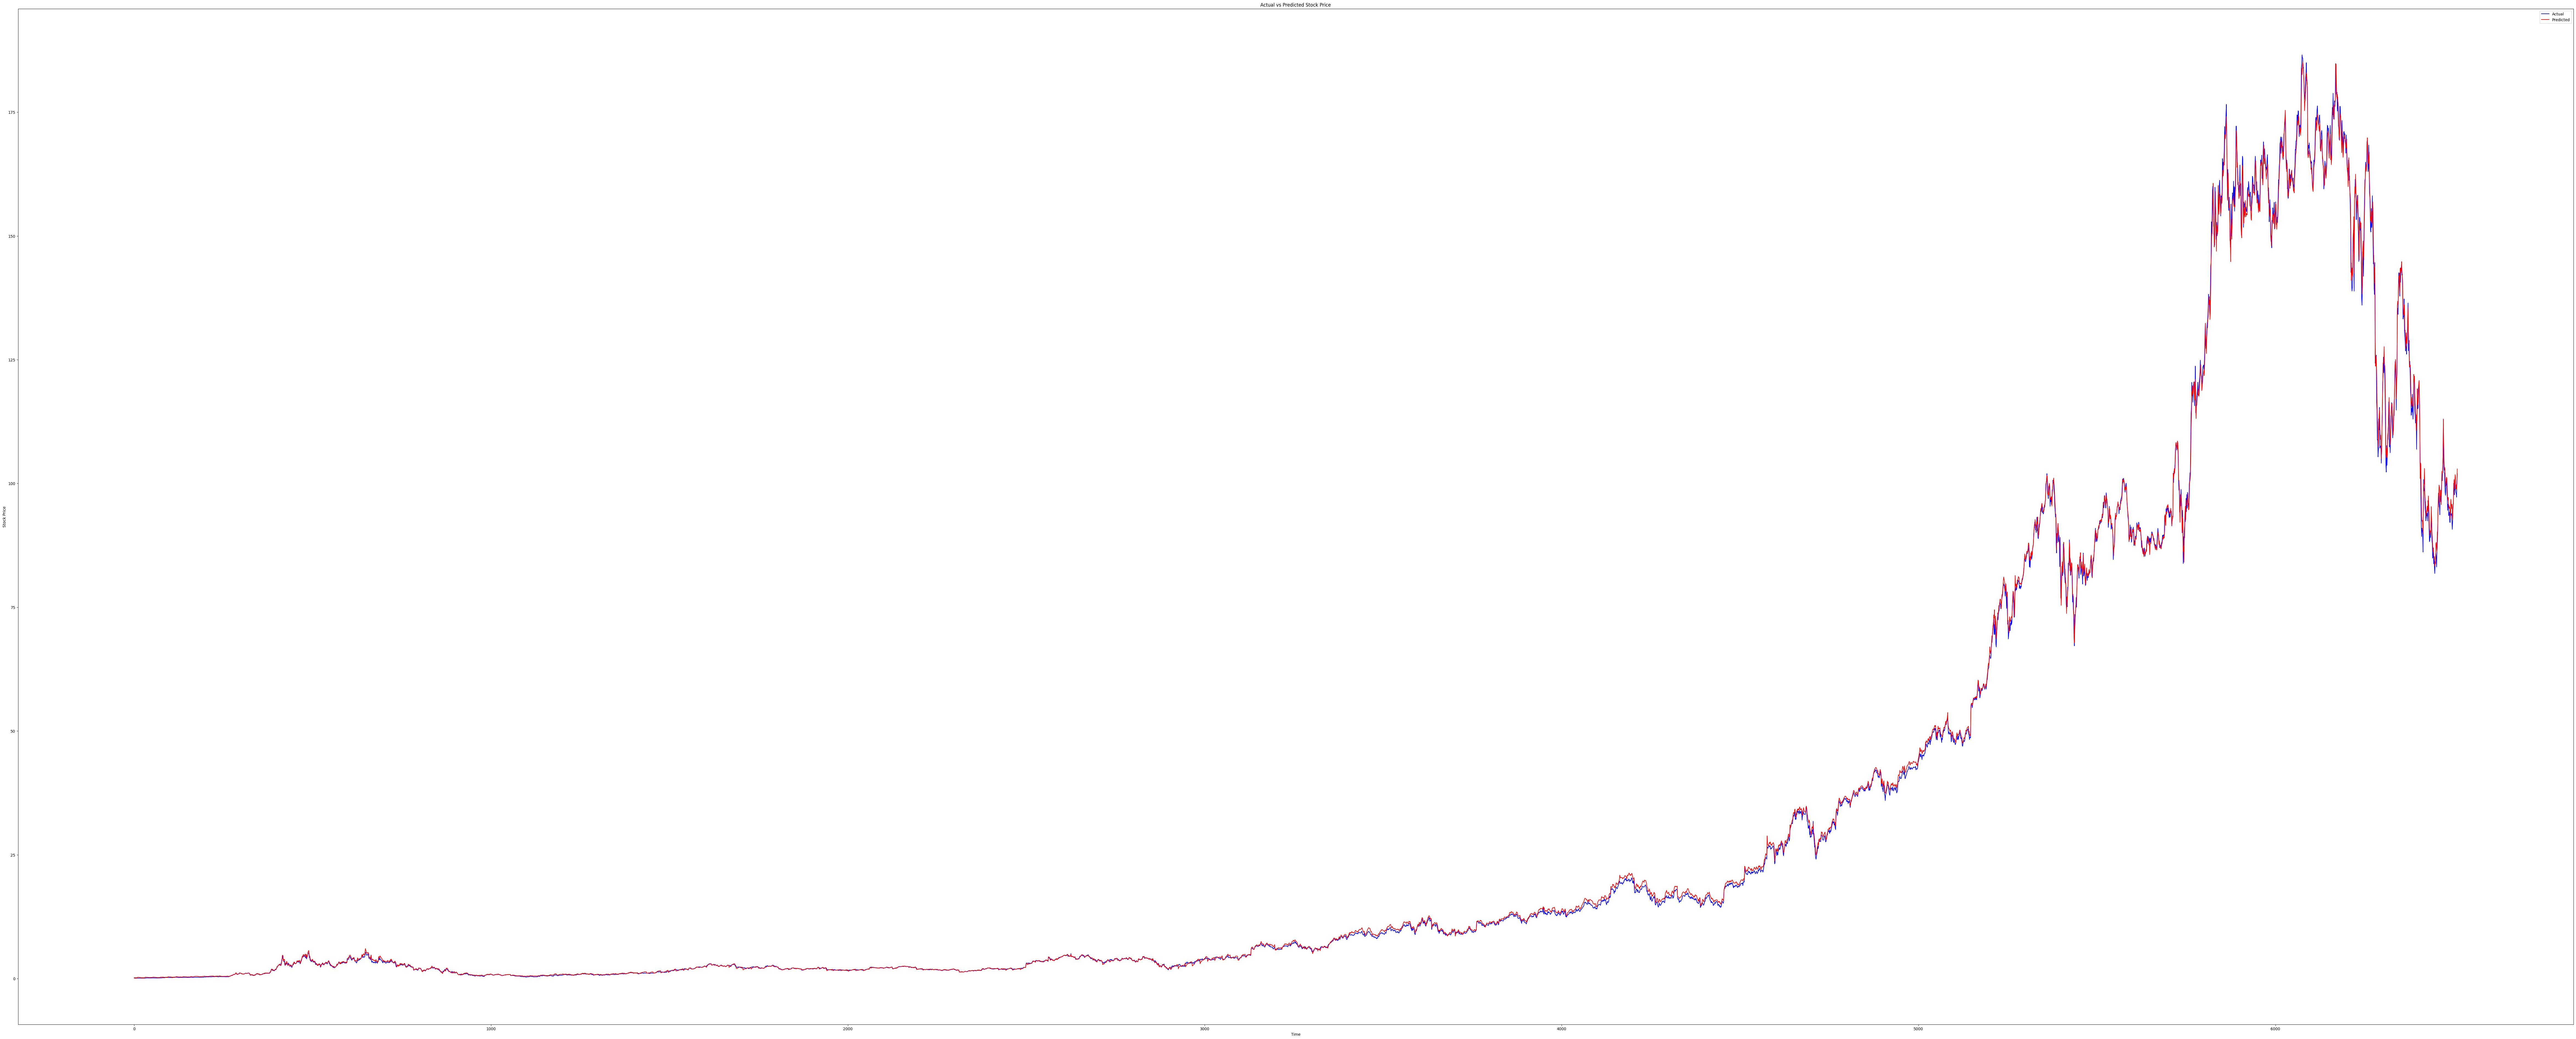

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(120,48))
plt.plot(PY['Close'], color='blue', label='Actual')
plt.plot(predicted_prices, color='red', label='Predicted')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()

plt.show()